# 01 - Exploration and Comparison of Normal and Pareto Distributions

In [72]:
from scipy.stats import powerlaw, norm, pareto
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

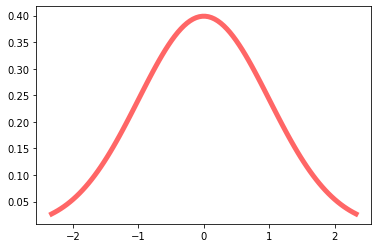

In [6]:
fig, ax = plt.subplots(1,1)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha = 0.6, label = "Normal PDF")

## Ratio of compound extreme events to much extreme events

Probability of an event with a sigma happening twice compared to probability of a single 2 sigma event

In [60]:
# for sigma in range(0.1, 5, 0.1):
#     ratio.append((1 - norm.cdf(sigma)**2) / (1 - norm.cdf(2*sigma)))
sigma_range = np.arange(0.1, 3.5, 0.1)
normal_ratio = [(1 - norm.cdf(sigma))**2 / (1 - norm.cdf(2*sigma)) 
         for sigma in sigma_range]

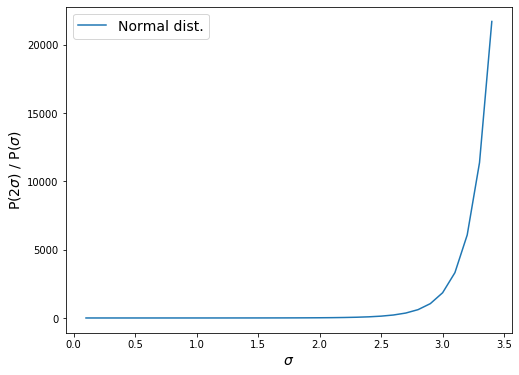

In [65]:
fig, ax = plt.subplots(1,1, figsize = (8,6))
ax.plot(sigma_range, normal_ratio, label = "Normal dist.")
ax.set_ylabel("P(2$\sigma$) / P($\sigma$)", fontsize = 14) 
ax.set_xlabel("$\sigma$", fontsize = 14)
ax.legend(fontsize = 14)

# Pareto

$f(x,b) = \frac{b}{x^{b+1}}$ 

for $x \geq 1, b > 0$

In [108]:
b = 1.13 #correspondingly alpha = 2.13

samples = np.linspace(start=1, stop=5, num=10000)

y = np.array([pareto.pdf(x=samples, b=b)])

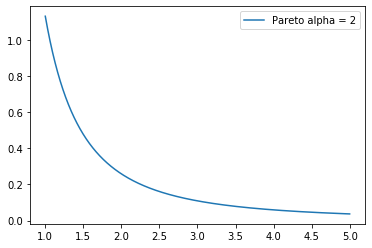

In [109]:
fig, ax = plt.subplots()
ax.plot(samples, y.T, label = "Pareto alpha = 2")
ax.legend()

In [110]:
mean, var, skew, kurt = pareto.stats(b, moments='mvsk')
print(f"Mean: {mean} - std: {np.sqrt(var)}")

Mean: 8.692307692307699 - std: inf


# Convergence of sample mean to distribution mean
## Compare Normal Distribution to Pareto

Define a normal distribution with mean 5 and variance 0

In [111]:
mean, var = norm.stats(5, 1)
print(f"Mean: {mean} - std: {np.sqrt(var)}")

Mean: 5.0 - std: 1.0


Then a pareto distribution with b = 1.13 ($\alpha$ = -2.13)

In [112]:
b = 1.13
mean, var = pareto.stats(b)
print(f"Mean: {mean} - std: {np.sqrt(var)}")

Mean: 8.692307692307699 - std: inf


In [161]:
sample_sizes = 20000

In [162]:
pareto_samples, normal_samples = [], []
pareto_mean, normal_mean = [], []

for num_samples in range(1, sample_sizes):
    pareto_samples.append(pareto.rvs(b, size = 1))
    normal_samples.append(norm.rvs(8.69, 1, size = 1))
    
    pareto_mean.append(np.mean(pareto_samples))
    normal_mean.append(np.mean(normal_samples))

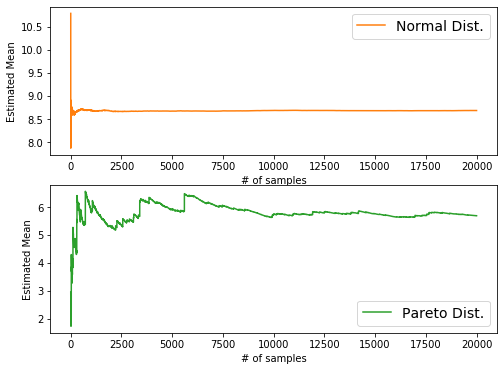

In [163]:
fig, ax = plt.subplots(2,1, figsize = (8,6))
ax[0].plot(np.arange(1,sample_sizes), normal_mean, color = "C1", label = "Normal Dist.")
ax[0].set_xlabel("# of samples")
ax[0].set_ylabel("Estimated Mean")
ax[0].legend(fontsize = 14)
ax[1].plot(np.arange(1,sample_sizes), pareto_mean, color = "C2", label = "Pareto Dist.")
ax[1].set_xlabel("# of samples")
ax[1].set_ylabel("Estimated Mean")
ax[1].legend(fontsize = 14)

Observe that, it takes **way way more samples** to converge to the true mean for the *Pareto distribution*, whereas it takes only a small amount of samples to get the tru mean of the Normal Distribution. This is a crucial point!